In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [ ]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [6]:
from autometrics.metrics.llm_judge.LLMJudgeNormalizeOptimized import LLMJudgeNormalizeOptimized

In [ ]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeNormalizeOptimized(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Answer the user query as a helpful chatbot assistant.",
        target_column=target_column,
        output_prompt_path='helpsteer_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  0%|          | 8/13663 [00:00<03:29, 65.26it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  0%|          | 7/13663 [00:00<00:47, 286.70it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 5/19


  0%|          | 8/13663 [00:00<00:44, 309.00it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 6/19


  0%|          | 7/13663 [00:00<00:47, 289.28it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 7/19


  0%|          | 8/13663 [00:00<00:47, 289.06it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


  0%|          | 4/13663 [00:00<00:52, 261.08it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 9/19


  0%|          | 1/13663 [00:00<01:18, 174.37it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


  0%|          | 4/13663 [00:00<00:50, 269.45it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 11/19


  0%|          | 4/13663 [00:00<01:56, 117.48it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 12/19


  0%|          | 5/13663 [00:00<01:15, 179.98it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  0%|          | 4/13663 [00:00<00:51, 264.53it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 14/19


  0%|          | 7/13663 [00:00<00:54, 248.69it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 15/19


  0%|          | 2/13663 [00:00<00:51, 264.35it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 16/19


  0%|          | 2/13663 [00:00<01:10, 193.56it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 17/19


  0%|          | 4/13663 [00:00<00:52, 260.62it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 18/19


  0%|          | 8/13663 [00:00<00:54, 248.46it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 19/19


  0%|          | 6/13663 [00:00<02:24, 94.24it/s]


Bootstrapped 6 full traces after 7 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the given text based on the provided task description and metric, providing a score from 1 to 5 along with a clear and concise reasoning for the assigned score, ensuring that the evaluation is objective and aligned with the specified metric.

2: Given a user query and a chatbot response, evaluate the helpfulness of the response by considering how well it addresses the user's question, provides relevant information, and is easy to understand. Use a score from 1-5 to rate the

Average Metric: 203.11666666666673 / 300  (67.7): 100%|██████████| 300/300 [00:01<00:00, 252.23it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 67.71

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 19.333333333333332 / 25  (77.3): 100%|██████████| 25/25 [00:00<00:00, 360.52it/s]


Score: 77.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [77.33]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 2 / 25 ==


Average Metric: 13.833333333333334 / 25  (55.3): 100%|██████████| 25/25 [00:00<00:00, 308.32it/s]


Score: 55.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [77.33, 55.33]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 3 / 25 ==


Average Metric: 17.366666666666667 / 25  (69.5): 100%|██████████| 25/25 [00:00<00:00, 289.43it/s]


Score: 69.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [77.33, 55.33, 69.47]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 4 / 25 ==


Average Metric: 14.666666666666666 / 25  (58.7): 100%|██████████| 25/25 [00:00<00:00, 423.88it/s]


Score: 58.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 5 / 25 ==


Average Metric: 17.4 / 25  (69.6): 100%|██████████| 25/25 [00:00<00:00, 5031.31it/s]              


Score: 69.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 6 / 25 ==


Average Metric: 16.866666666666667 / 25  (67.5): 100%|██████████| 25/25 [00:00<00:00, 353.39it/s]


Score: 67.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 7 / 25 ==


Average Metric: 16.0 / 25  (64.0): 100%|██████████| 25/25 [00:00<00:00, 302.67it/s]              


Score: 64.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 8 / 25 ==


Average Metric: 17.25 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 253.12it/s]             


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 9 / 25 ==


Average Metric: 16.0 / 25  (64.0): 100%|██████████| 25/25 [00:00<00:00, 271.46it/s]


Score: 64.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0]
Full eval scores so far: [67.71]
Best full score so far: 67.71


== Minibatch Trial 10 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 364.71it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33]
Full eval scores so far: [67.71]
Best full score so far: 67.71


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 77.33) from minibatch trials...


Average Metric: 198.53333333333342 / 300  (66.2): 100%|██████████| 300/300 [00:00<00:00, 310.21it/s]


Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 11 / 25 ==


Average Metric: 16.833333333333332 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 242.42it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 12 / 25 ==


Average Metric: 17.166666666666664 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 3999.30it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 13 / 25 ==


Average Metric: 18.666666666666668 / 25  (74.7): 100%|██████████| 25/25 [00:00<00:00, 524.61it/s]


Score: 74.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 14 / 25 ==


Average Metric: 16.666666666666664 / 25  (66.7): 100%|██████████| 25/25 [00:00<00:00, 264.08it/s]


Score: 66.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 15 / 25 ==


Average Metric: 19.0 / 25  (76.0): 100%|██████████| 25/25 [00:00<00:00, 346.91it/s]             


Score: 76.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 16 / 25 ==


Average Metric: 18.5 / 25  (74.0): 100%|██████████| 25/25 [00:00<00:00, 300.37it/s]              


Score: 74.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 17 / 25 ==


Average Metric: 17.166666666666668 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 207.97it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 18 / 25 ==


Average Metric: 15.916666666666668 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 280.20it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 19 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 313.47it/s]             

Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


== Minibatch Trial 20 / 25 ==



Average Metric: 17.916666666666664 / 25  (71.7): 100%|██████████| 25/25 [00:00<00:00, 280.26it/s]

Score: 71.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 17'].


Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67]
Full eval scores so far: [67.71, 66.18]
Best full score so far: 67.71


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 74.67) from minibatch trials...


Average Metric: 205.78333333333345 / 300  (68.6): 100%|██████████| 300/300 [00:00<00:00, 307.70it/s]


New best full eval score! Score: 68.59
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


== Minibatch Trial 21 / 25 ==


Average Metric: 17.333333333333332 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 308.06it/s]


Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67, 69.33]
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


== Minibatch Trial 22 / 25 ==


Average Metric: 18.416666666666668 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 199.26it/s]


Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67, 69.33, 73.67]
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


== Minibatch Trial 23 / 25 ==


Average Metric: 17.5 / 25  (70.0): 100%|██████████| 25/25 [00:00<00:00, 5967.65it/s]              


Score: 70.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67, 69.33, 73.67, 70.0]
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


== Minibatch Trial 24 / 25 ==


Average Metric: 16.416666666666664 / 25  (65.7): 100%|██████████| 25/25 [00:00<00:00, 233.78it/s]


Score: 65.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67, 69.33, 73.67, 70.0, 65.67]
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


== Minibatch Trial 25 / 25 ==


Average Metric: 16.083333333333336 / 25  (64.3): 100%|██████████| 25/25 [00:00<00:00, 438.99it/s]


Score: 64.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [77.33, 55.33, 69.47, 58.67, 69.6, 67.47, 64.0, 69.0, 64.0, 65.33, 67.33, 68.67, 74.67, 66.67, 76.0, 74.0, 68.67, 63.67, 71.0, 71.67, 69.33, 73.67, 70.0, 65.67, 64.33]
Full eval scores so far: [67.71, 66.18, 68.59]
Best full score so far: 68.59


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 74.0) from minibatch trials...


Average Metric: 205.4500000000001 / 300  (68.5): 100%|██████████| 300/300 [00:01<00:00, 274.48it/s] 


Full eval scores so far: [67.71, 66.18, 68.59, 68.48]
Best full score so far: 68.59


Returning best identified program with score 68.59!


Grading rows:   0%|          | 0/14163 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/21164 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index,

Error processing row 4642: Expected dict_keys(['reasoning', 'score']) but got dict_keys(['reasoning'])
Error processing row 4643: Expected dict_keys(['reasoning', 'score']) but got dict_keys(['reasoning'])


Grading rows: 100%|██████████| 1789/1789 [00:05<00:00, 326.62row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  0%|          | 8/13663 [00:00<00:46, 294.31it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  0%|          | 7/13663 [00:00<00:55, 244.00it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 5/19


  0%|          | 8/13663 [00:00<00:44, 307.88it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 6/19


  0%|          | 7/13663 [00:00<00:49, 274.50it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 7/19


  0%|          | 8/13663 [00:00<00:51, 266.65it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


  0%|          | 4/13663 [01:10<66:38:31, 17.56s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 9/19


  0%|          | 1/13663 [00:11<44:54:23, 11.83s/it]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


  0%|          | 4/13663 [01:41<96:06:27, 25.33s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 11/19


  0%|          | 4/13663 [01:06<63:12:10, 16.66s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 12/19


  0%|          | 5/13663 [01:27<66:39:10, 17.57s/it]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  0%|          | 4/13663 [01:24<80:31:24, 21.22s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 14/19


  0%|          | 7/13663 [01:44<56:31:30, 14.90s/it]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 15/19


  0%|          | 2/13663 [00:31<59:57:29, 15.80s/it]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 16/19


  0%|          | 2/13663 [00:39<74:59:44, 19.76s/it]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 17/19


  0%|          | 4/13663 [00:53<50:42:11, 13.36s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 18/19


  0%|          | 2/13663 [00:10<19:29:14,  5.14s/it]

In [ ]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),meaning_llama70b (0.5605834239799072),BERTScoreF_roberta-large (0.5376877382185893),simplicity_llama70b (0.5306305580084716),BLEU (0.41617364713787347)
meaning,BERTScoreF_roberta-large (0.7232674330257098),meaning_llama70b (0.6266100758291658),BERTScoreP_roberta-large (0.6106572417507335),BERTScoreR_roberta-large (0.7413929364907887),CHRF (0.6554432845335177)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),meaning_llama70b (0.5202814416823078),simplicity_llama70b (0.4940496882427354),BERTScoreF_roberta-large (0.5279062401502087),BLEU (0.4511342893339773)


In [ ]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 3/3 [00:00<00:00, 22.35it/s]


In [ ]:
train.get_metric_columns()

['BLEU',
 'CHRF',
 'TER',
 'GLEU',
 'SARI_P',
 'SARI_F',
 'BERTScoreP_roberta-large',
 'BERTScoreR_roberta-large',
 'BERTScoreF_roberta-large',
 'FKGL',
 'fluency_Meta-Llama-3-70b-Instruct',
 'meaning_Meta-Llama-3-70b-Instruct',
 'simplicity_Meta-Llama-3-70b-Instruct']

In [ ]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 3/3 [00:00<00:00, 17.47it/s]


In [ ]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),Rg_fluency_llm (0.5472944626881918),Rg_simplicity_llm (0.5446220074784641),meaning_llama70b (0.5605834239799072),Rg_meaning_llm (0.5385218048743794)
meaning,Rg_meaning_llm (0.6989087093870684),BERTScoreF_roberta-large (0.7232674330257098),meaning_llama70b (0.6266100758291658),BERTScoreP_roberta-large (0.6106572417507335),BERTScoreR_roberta-large (0.7413929364907887)
simplicity,Rg_fluency_llm (0.5627033369145357),Rg_simplicity_llm (0.568987794265274),BERTScoreP_roberta-large (0.6150344373913592),meaning_llama70b (0.5202814416823078),Rg_meaning_llm (0.5170325240084672)


In [ ]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),meaning_llama70b (0.5605834239799072),Rg_fluency_llm (0.5472944626881918),Rg_simplicity_llm (0.5446220074784641),Rg_meaning_llm (0.5385218048743794)
meaning,BERTScoreR_roberta-large (0.7413929364907887),BERTScoreF_roberta-large (0.7232674330257098),Rg_meaning_llm (0.6989087093870684),CHRF (0.6554432845335177),meaning_llama70b (0.6266100758291658)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),Rg_simplicity_llm (0.568987794265274),Rg_fluency_llm (0.5627033369145357),BERTScoreF_roberta-large (0.5279062401502087),meaning_llama70b (0.5202814416823078)


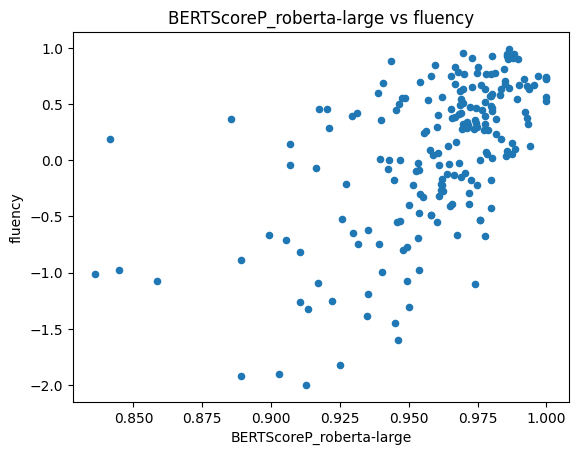

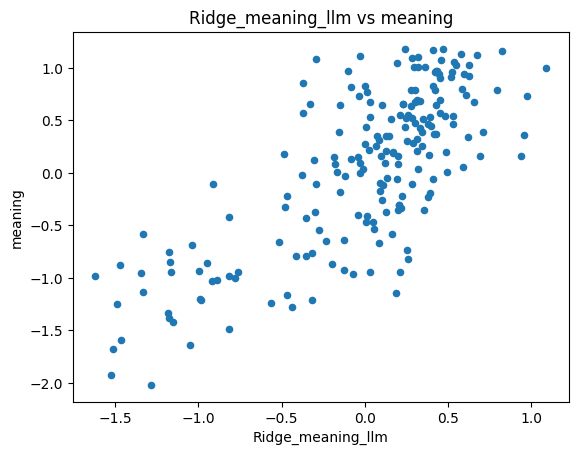

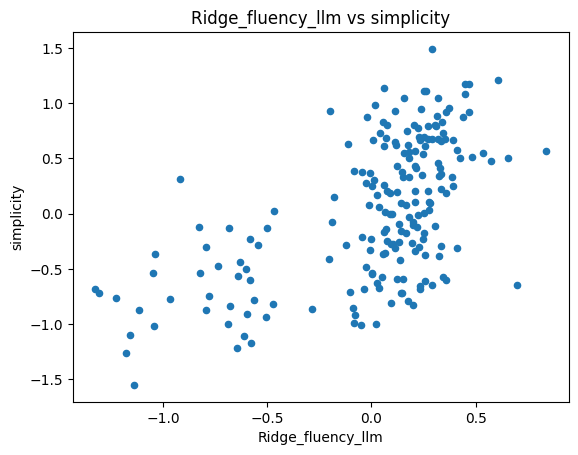

In [ ]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
